### Importing:

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns

# Load the dataset
df = pd.read_csv('data.csv')

In [3]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 district              0
price                 0
state_construction    0
living_area           0
bedrooms              0
bathrooms             0
has_garden            0
kitchen               0
fireplace             0
swimmingpool          0
has_terrace           0
has_attic             0
has_basement          0
epc                   0
area_total            0
dtype: int64


In [4]:
df.shape

(27123, 15)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'state_construction'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'has_garden'}>,
        <Axes: title={'center': 'kitchen'}>,
        <Axes: title={'center': 'fireplace'}>],
       [<Axes: title={'center': 'swimmingpool'}>,
        <Axes: title={'center': 'has_terrace'}>,
        <Axes: title={'center': 'has_attic'}>,
        <Axes: title={'center': 'has_basement'}>],
       [<Axes: title={'center': 'epc'}>,
        <Axes: title={'center': 'area_total'}>, <Axes: >, <Axes: >]],
      dtype=object)

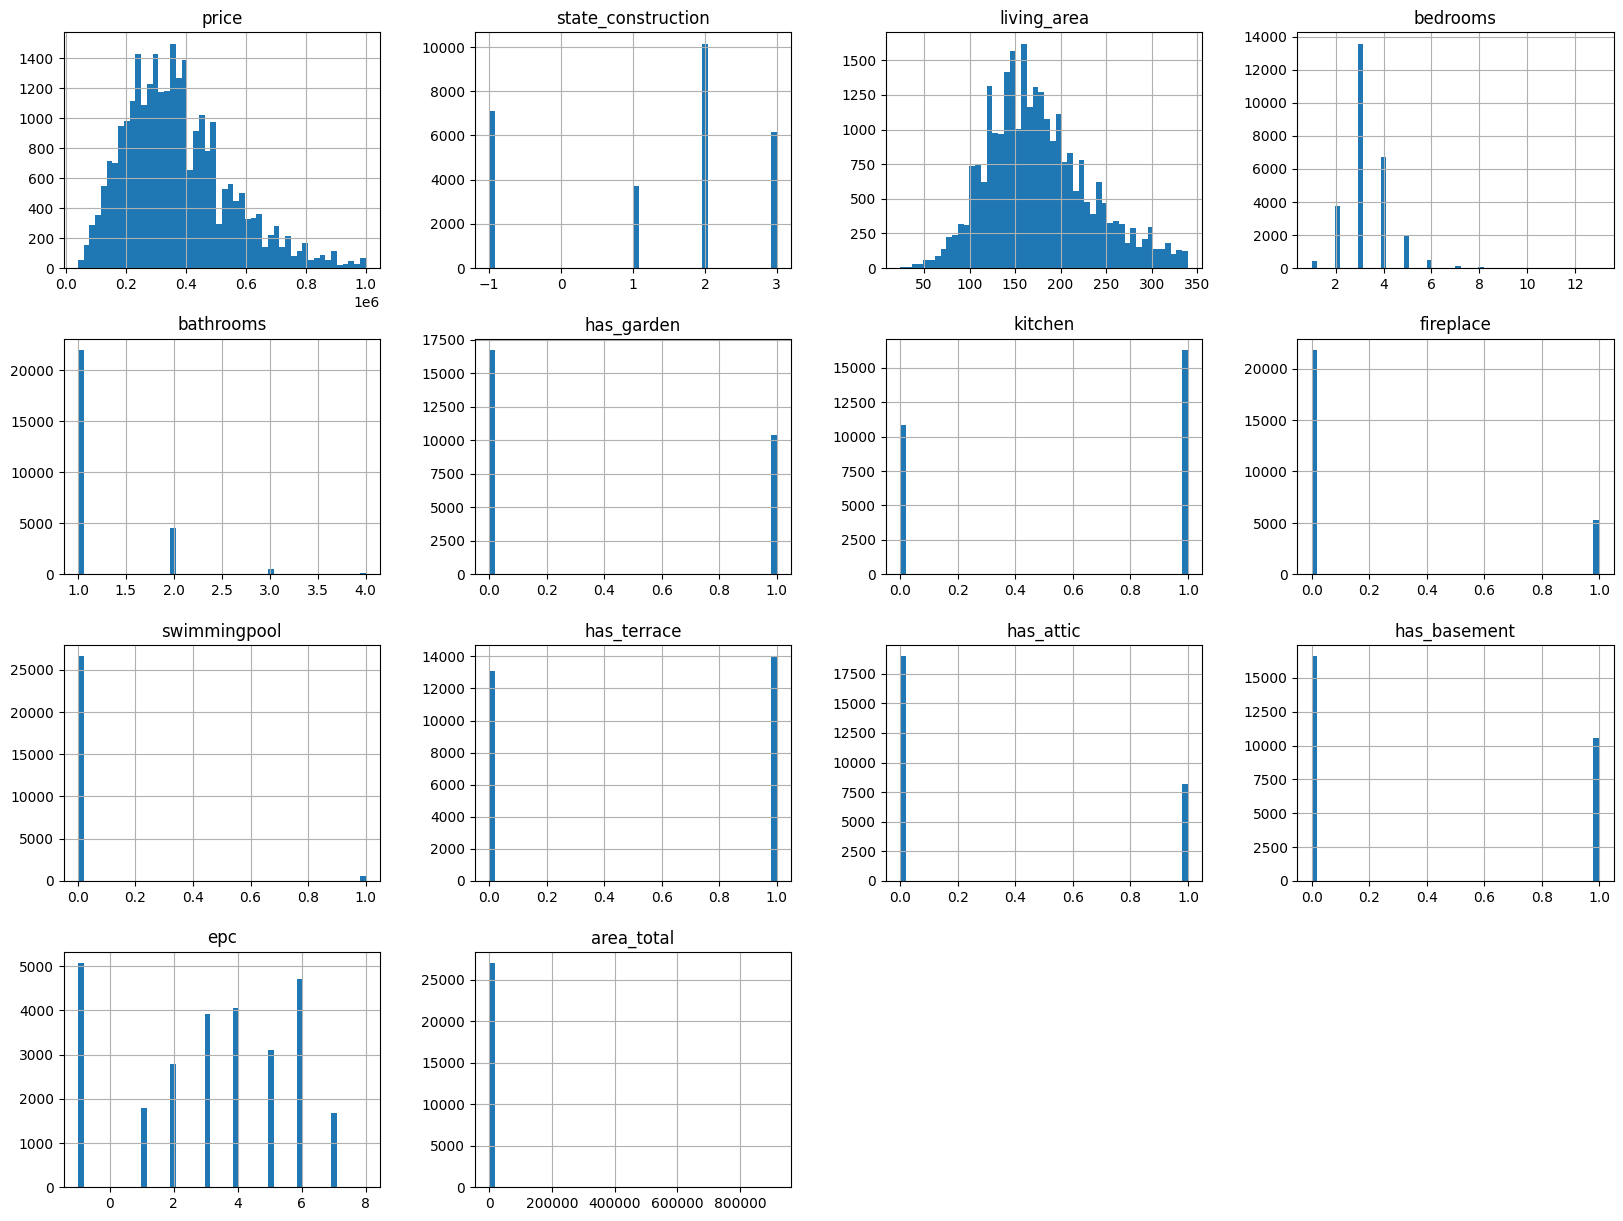

In [5]:
df.hist(bins=50, figsize=(20,15))

In [179]:
# from sklearn.preprocessing import OneHotEncoder


# # Initialize the OneHotEncoder
# ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# # Fit and transform the 'district' column
# # Note: OneHotEncoder expects a 2D array, hence the reshape
# district_encoded = ohe.fit_transform(df[['district']])

# # Convert the encoded result into a DataFrame with appropriate column names
# district_encoded_df = pd.DataFrame(
#     district_encoded, columns=ohe.get_feature_names_out(['district']))

# # Concatenate the new DataFrame with the original DataFrame (minus the 'district' column)
# df_encoded = pd.concat(
#     [df.drop(['district'], axis=1), district_encoded_df], axis=1)

In [6]:

from sklearn.preprocessing import OneHotEncoder

# Assuming 'data' is your DataFrame and 'district' is the categorical column
# Create a one-hot encoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the 'district' column and create a new DataFrame with these columns
district_encoded = encoder.fit_transform(df[['district']])
district_encoded_df = pd.DataFrame(
    district_encoded, columns=encoder.get_feature_names_out(['district']))

# Concatenate the new one-hot encoded DataFrame with the original DataFrame (minus the 'district' column)
data_numeric = df.drop('district', axis=1)
data_encoded = pd.concat([data_numeric, district_encoded_df], axis=1)

In [7]:
data_encoded.isnull().sum()

price                         0
state_construction            0
living_area                   0
bedrooms                      0
bathrooms                     0
has_garden                    0
kitchen                       0
fireplace                     0
swimmingpool                  0
has_terrace                   0
has_attic                     0
has_basement                  0
epc                           0
area_total                    0
district_aalst                0
district_antwerp              0
district_arlon                0
district_ath                  0
district_bastogne             0
district_brugge               0
district_brussels             0
district_charleroi            0
district_dendermonde          0
district_diksmuide            0
district_dinant               0
district_eeklo                0
district_gent                 0
district_halle-vilvoorde      0
district_hasselt              0
district_huy                  0
district_ieper                0
district

In [8]:
data_encoded.shape

(27123, 57)

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler for standardization
scaler_standard = StandardScaler()
data_standardized = scaler_standard.fit_transform(data_encoded)
data_standardized = pd.DataFrame(
    data_standardized, columns=data_encoded.columns)

# MinMaxScaler for normalization
scaler_minmax = MinMaxScaler()
data_normalized = scaler_minmax.fit_transform(data_encoded)
data_normalized = pd.DataFrame(data_normalized, columns=data_encoded.columns)

In [10]:
from sklearn.model_selection import train_test_split

# Choose the dataset you decided to use (standardized or normalized)
# Replace 'target_column' with the name of your target variable
X = data_standardized.drop('price', axis=1)
y = data_standardized['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

train_score = lr_model.score(X_train, y_train)
print(train_score)

Mean Squared Error: 0.4230411539608783
R-squared: 0.5737641697951563
0.5876181552023476


In [13]:
lr_model.predict(X_test)

array([ 0.58778981,  0.48085622,  0.9044402 , ...,  0.76528005,
       -0.75742503, -0.87754222])

In [14]:
lr_model.score(X_test, y_test)

0.5737641697951563

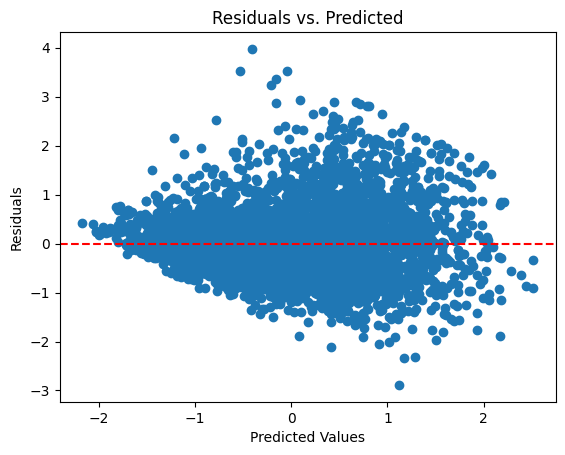

In [16]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)

plt.title('Residuals vs. Predicted')

plt.xlabel('Predicted Values')

plt.ylabel('Residuals')

plt.axhline(y=0, color='r', linestyle='--')

plt.show()

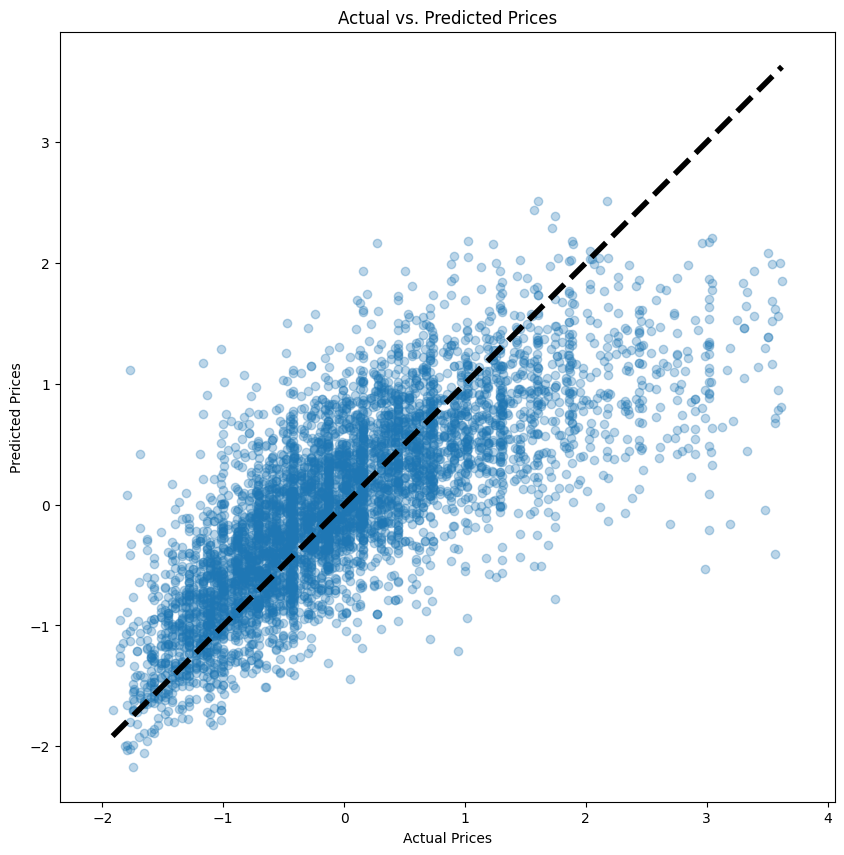

In [17]:
import matplotlib.pyplot as plt

# Assuming `y_test` contains the actual prices and `y_pred` contains the model's predictions
actual = y_test
predicted = y_pred

plt.figure(figsize=(10, 10))
plt.scatter(actual, predicted, alpha=0.3)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Plotting the perfect prediction line
plt.plot([actual.min(), actual.max()], [
         actual.min(), actual.max()], 'k--', lw=4)
plt.axis('equal')

plt.show()

In [18]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
forest.score(X_test, y_test)

0.7173511106477024

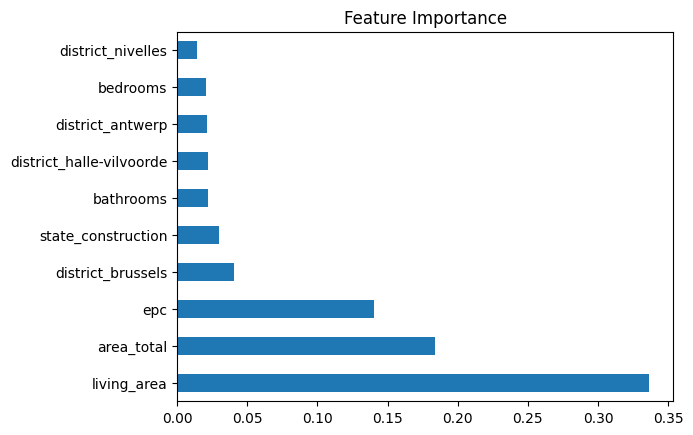

In [20]:

# Get feature importances
importances = forest.feature_importances_

# Convert to a Series for easy plotting
feature_importances = pd.Series(importances, index=X_train.columns)

# Plot
# You can adjust the number to display more/less features
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

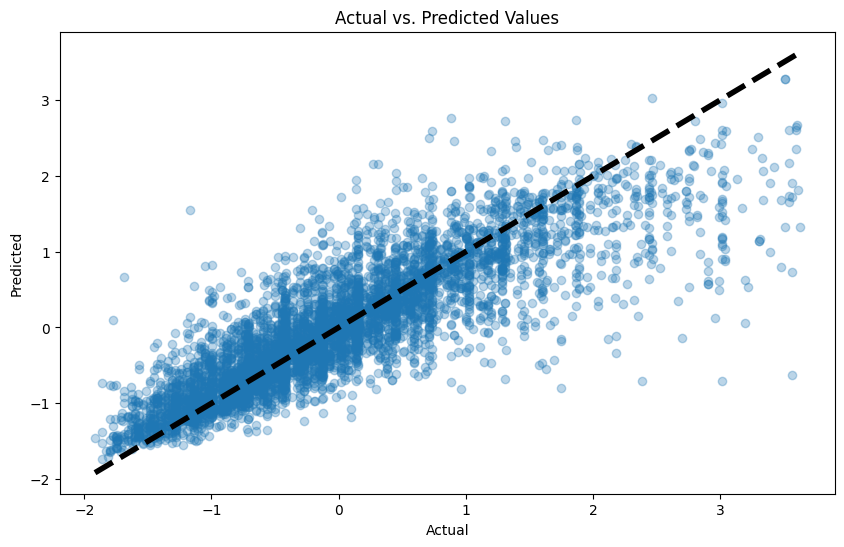

In [21]:
# Predict on the test set
y_pred = forest.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(),
         y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

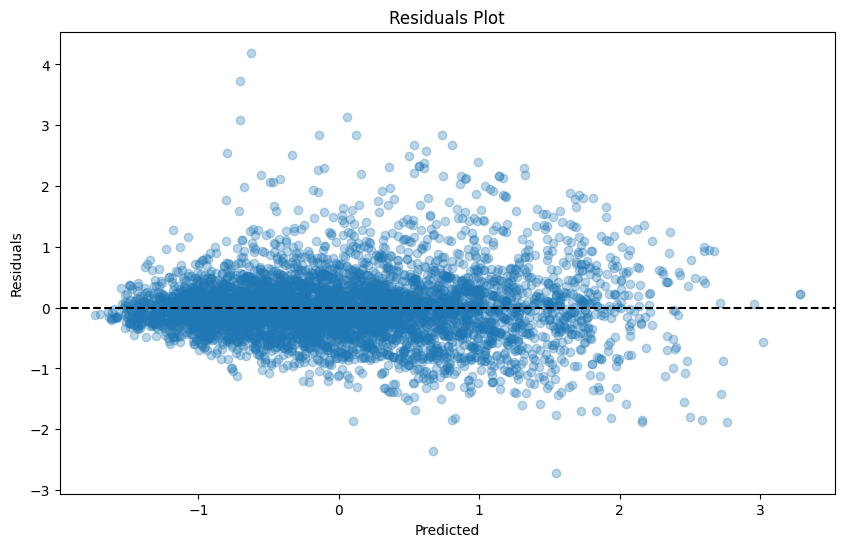

In [22]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [30, 50, 100],
    'max_features': [6, 8, 10, 12],
    'min_samples_split': [2, 4, 6, 8]
}
grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [6, 8, 10, 12],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(max_features=8)

In [58]:
best_forest.score(X_test, y_test)

0.7312640835281309